In [26]:
import pandas as pd
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import preprocessing
from sklearn import utils

In [2]:
test_df = pd.read_csv('Test_u94Q5KV.csv')
train_df = pd.read_csv('Train_UWu5bXk.csv')
sample_sub_df = pd.read_csv('SampleSubmission_TmnO39y.csv')

In [3]:
display(test_df.head(5))
display(sample_sub_df.head(5))
display(train_df.head(10))

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,NaN
1,FDW14,OUT017,NaN
2,NCN55,OUT010,NaN
3,FDQ58,OUT017,NaN
4,FDY38,OUT027,NaN


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


# Simple data visualizations

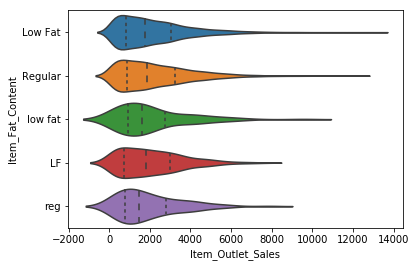

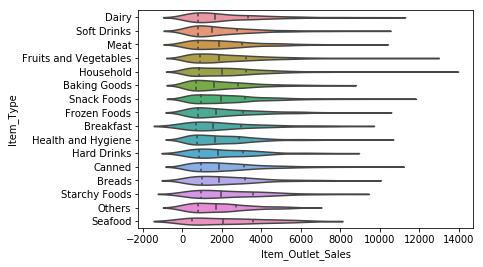

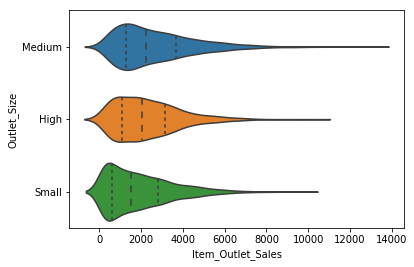

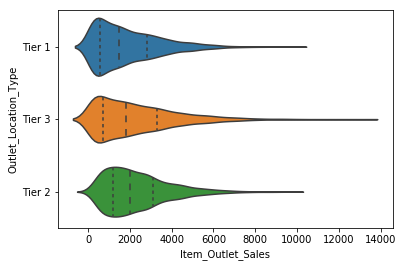

In [4]:
g = sns.violinplot(y=train_df.Item_Fat_Content, x=train_df.Item_Outlet_Sales, inner='quartile')
plt.show()
g = sns.violinplot(y=train_df.Item_Type, x=train_df.Item_Outlet_Sales, inner='quartile')
plt.show()
g = sns.violinplot(y=train_df.Outlet_Size, x=train_df.Item_Outlet_Sales, inner='quartile')
plt.show()
g = sns.violinplot(y=train_df.Outlet_Location_Type, x=train_df.Item_Outlet_Sales, inner='quartile')
plt.show()
plt.show()

/Users/jay/.pyenv/versions/3.6.2/envs/data_science_3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


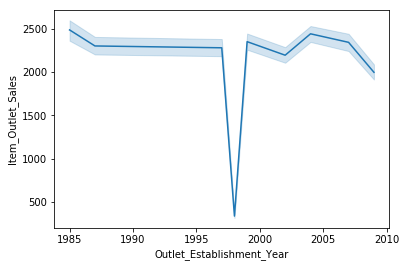

In [5]:
establishment_data_df = train_df[['Outlet_Establishment_Year','Item_Outlet_Sales']]

ax = sns.lineplot(x="Outlet_Establishment_Year", y="Item_Outlet_Sales", data=establishment_data_df)

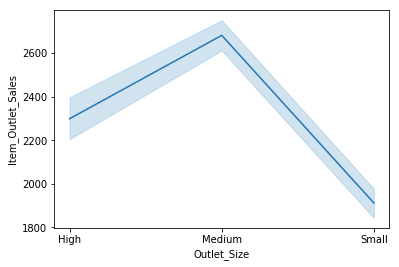

In [6]:
establishment_size_data_df = train_df[['Outlet_Size','Item_Outlet_Sales']]

ax = sns.lineplot(x="Outlet_Size", y="Item_Outlet_Sales", data=establishment_size_data_df)

# Check for Nulls

In [7]:
train_df.loc[:, train_df.isna().any()]

,Item_Weight,Outlet_Size
0,9.300,Medium
1,5.920,Medium
2,17.500,Medium
3,19.200,NaN
4,8.930,High
5,10.395,Medium
6,13.650,High
7,NaN,Medium
8,16.200,NaN
9,19.200,NaN


In [8]:
train_df['Item_Weight'] = train_df['Item_Weight'].fillna((train_df['Item_Weight'].median()))
test_df['Item_Weight'] = test_df['Item_Weight'].fillna((test_df['Item_Weight'].median()))

In [9]:
train_df['Outlet_Size'].describe()

count       6113
unique         3
top       Medium
freq        2793
Name: Outlet_Size, dtype: object

In [10]:
train_df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [11]:
train_df['Outlet_Size'].isna().sum() 

2410

In [12]:
# train_df['Outlet_Size'] = train_df['Outlet_Size'].replace({'NaN': 'Misc'})

In [13]:
display(train_df.head(5))

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [14]:
train_df = pd.get_dummies(train_df, columns=['Item_Fat_Content'])
train_df = pd.get_dummies(train_df, columns=['Item_Type'])
train_df = pd.get_dummies(train_df, columns=['Outlet_Size'])
train_df = pd.get_dummies(train_df, columns=['Outlet_Location_Type'])
train_df = pd.get_dummies(train_df, columns=['Outlet_Type'])

In [15]:
display(train_df.head(5))

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0.016047,249.8092,OUT049,1999,3735.1380,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1,DRC01,5.92,0.019278,48.2692,OUT018,2009,443.4228,0,0,1,...,0,1,0,0,0,1,0,0,1,0
2,FDN15,17.50,0.016760,141.6180,OUT049,1999,2097.2700,0,1,0,...,0,1,0,1,0,0,0,1,0,0
3,FDX07,19.20,0.000000,182.0950,OUT010,1998,732.3800,0,0,1,...,0,0,0,0,0,1,1,0,0,0
4,NCD19,8.93,0.000000,53.8614,OUT013,1987,994.7052,0,1,0,...,1,0,0,0,0,1,0,1,0,0


In [16]:
test_df = pd.get_dummies(test_df, columns=['Item_Fat_Content'])
test_df = pd.get_dummies(test_df, columns=['Item_Type'])
test_df = pd.get_dummies(test_df, columns=['Outlet_Size'])
test_df = pd.get_dummies(test_df, columns=['Outlet_Location_Type'])
test_df = pd.get_dummies(test_df, columns=['Outlet_Type'])

In [17]:
display(test_df.head(5))

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDW58,20.750,0.007565,107.8622,OUT049,1999,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
1,FDW14,8.300,0.038428,87.3198,OUT017,2007,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,NCN55,14.600,0.099575,241.7538,OUT010,1998,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
3,FDQ58,7.315,0.015388,155.0340,OUT017,2007,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,FDY38,12.500,0.118599,234.2300,OUT027,1985,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1


In [18]:
scaler = MinMaxScaler()
train_df[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']] = scaler.fit_transform(train_df[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']])
test_df[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']] = scaler.fit_transform(test_df[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']])

/Users/jay/.pyenv/versions/3.6.2/envs/data_science_3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/jay/.pyenv/versions/3.6.2/envs/data_science_3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [19]:
display(train_df.head(5))

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,0.282525,0.048866,0.927507,OUT049,0.583333,3735.1380,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1,DRC01,0.081274,0.058705,0.072068,OUT018,1.000000,443.4228,0,0,1,...,0,1,0,0,0,1,0,0,1,0
2,FDN15,0.770765,0.051037,0.468288,OUT049,0.583333,2097.2700,0,1,0,...,0,1,0,1,0,0,0,1,0,0
3,FDX07,0.871986,0.000000,0.640093,OUT010,0.541667,732.3800,0,0,1,...,0,0,0,0,0,1,1,0,0,0
4,NCD19,0.260494,0.000000,0.095805,OUT013,0.083333,994.7052,0,1,0,...,1,0,0,0,0,1,0,1,0,0


In [20]:
display(test_df.head(5))

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDW58,0.964275,0.023374,0.323413,OUT049,0.583333,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
1,FDW14,0.222983,0.118737,0.235849,OUT017,0.916667,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,NCN55,0.598095,0.307674,0.894140,OUT010,0.541667,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
3,FDQ58,0.164335,0.047548,0.524488,OUT017,0.916667,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,FDY38,0.473057,0.366458,0.862069,OUT027,0.000000,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1


In [42]:
X = train_df.drop('Item_Identifier', axis=1)
X = X.drop('Outlet_Identifier', axis=1)
X = X.drop('Item_Outlet_Sales', axis=1)
y = train_df['Item_Outlet_Sales']

test_tmp_df = test_df.drop('Item_Identifier', axis=1)
test_tmp_df = test_tmp_df.drop('Outlet_Identifier', axis=1)

display(X.shape)
display(y.shape)

(8523, 35)

(8523,)

In [29]:
lg = LogisticRegression()
lg.fit(X,y)
y_pred = lg.predict(X)
print(metrics.accuracy_score(y,y_pred))

/Users/jay/.pyenv/versions/3.6.2/envs/data_science_3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Unknown label type: 'continuous'

In [27]:
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y))
print(utils.multiclass.type_of_target(y.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[2540  422 1639 ... 1018 1466  697]
continuous
multiclass
multiclass


In [31]:
lg = LogisticRegression()
lg.fit(X,training_scores_encoded)
y_pred = lg.predict(X)
print(metrics.accuracy_score(training_scores_encoded,y_pred))

/Users/jay/.pyenv/versions/3.6.2/envs/data_science_3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jay/.pyenv/versions/3.6.2/envs/data_science_3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.0434119441511205


In [43]:
y_test_pred = lg.predict(test_tmp_df)

In [46]:
final_submission_df = pd.DataFrame()
final_submission_df['Item_Identifier'] = test_df['Item_Identifier']
final_submission_df['Outlet_Identifier'] = test_df['Outlet_Identifier']
final_submission_df['Item_Outlet_Sales'] = y_test_pred

In [48]:
final_submission_df.to_csv('final_submission.csv')